### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 自变量是什么？
    因变量是什么？

* 自变量是一致和不一致的文字条件。
* 因变量是参与者的反应时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

执行以下两个检验：  
1.假设检验  
* $H_0$:   **$u_{congruent}$** >= **$u_{incongruent}$** ，$H_0$ 指文字和颜色一致条件下参与者反应时间不比文字和颜色不一致条件下参与者反应时间短  
* $H_1$:   **$u_{congruent}$** < **$u_{incongruent}$** ，$H_0$ 指文字和颜色一致条件下参与者反应时间比文字和颜色不一致条件下参与者反应时间短  
* **$u_{congruent}$** 为Congruent总体反应时间平均数  
* **$u_{incongruent}$** 为Incongruent总体反应时间平均数 

2.T检验  
* 由于数据中没有总体标准差而且样本数少于30，需要用 T 检验检测零假设的显著性，以alpha 0.05作为比较
* 由于两组样本来自相同的24位参与者，执行配对T检验

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

% matplotlib inline

df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.shape

(24, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
df.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

* 此数据集包含了24行，2列。24行为24名参与者，2行分别为文字和颜色一致条件下对应参与者的反应时间，文字和颜色不一致条件下参与者的反应时间。
* 数据集中没有缺失值，反应时间的数据类别是浮点数，合理。
* 由于每组样本数只有24个，少于30，需要做 t-test 以检测显著性。
* 根据以上描述性统计数据, 比较24个参与者分别在文字和颜色一致条件下以及文字和颜色不一致条件下的反应时间，有以下描述：  
1.平均数，Congruent组为14.05，Incongruent组为22.02，Congruent组比Incongruent组低；  
2.中位数，Congruent组为14.36，Incongruent组为21.02，结果和平均数接近；  
3.标准差，Congruent组为3.56，Incongruent组为4.80，Congruent组比Incongruent组低；  
4.四分位差，Q1Congruent组为11.90，Incongruent组为18.72，Q3Congruent组为16.20，Incongruent组为24.05，四分位差分别为4.30和5.33。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

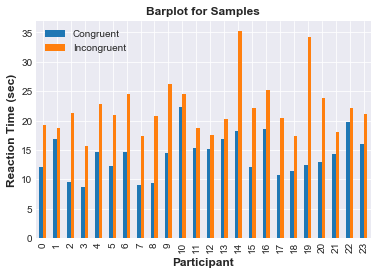

In [7]:
barplot = df.plot(x=None, y=None,kind='bar')
plt.title('Barplot for Samples',fontsize=12, fontweight='bold')
plt.xlabel('Participant',fontsize=12, fontweight='bold')
plt.ylabel('Reaction Time (sec)', fontsize=12, fontweight='bold')
plt.show()

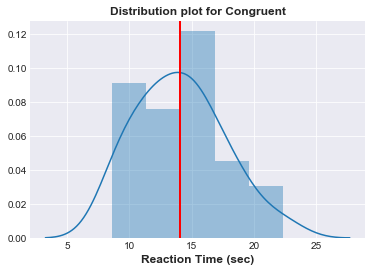

In [8]:
x = df['Congruent']
ax = sns.distplot(x)
plt.axvline(df['Congruent'].mean(), color='red', linewidth=2)

plt.title('Distribution plot for Congruent', fontsize=12, fontweight='bold')
plt.xlabel('Reaction Time (sec)', fontweight='bold', fontsize=12)
plt.show()

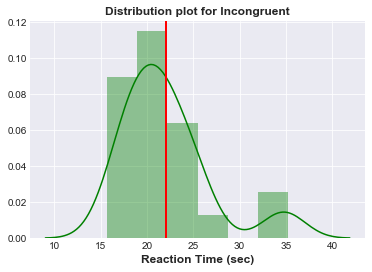

In [9]:
y = df['Incongruent']
ax = sns.distplot(y, color="g")
plt.axvline(df['Incongruent'].mean(), color='red', linewidth=2)

plt.title('Distribution plot for Incongruent', fontsize=12, fontweight='bold')
plt.xlabel('Reaction Time (sec)', fontweight='bold', fontsize=12)
plt.show()

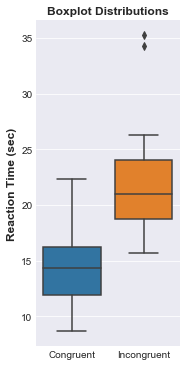

In [10]:
sns.factorplot(data=df, kind="box", size=5, aspect=.5);

plt.title('Boxplot Distributions', fontsize=12, fontweight='bold')
plt.ylabel('Reaction Time (sec)', fontweight='bold', fontsize=12)
plt.show()

* 根据图一条形图，2组24个参与者当中，全部样本在文字和颜色一致条件下参与者反应时间都比文字和颜色不一致条件下参与者反应时间短。
* 根据图二图三，Congruent和Incongruent的柱状图，排除Incongruent组的异常值，两组样本的分布形状相近。但是Incongruent组的平均数并不在分布的正中心，而是偏向右则。
* 根据图四箱线图，展示了两组数据的离散程度。排除Incongruent组的2点异常值，Congruent组的整体离散程度比Incongruent组大。Incongruent组的四分位差比Congruent组大。Congruent组在 min, 25%, 50%, 75%, max 各表现中均低于Incongruent组。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [11]:
# Calculate t_score mannually
diff = df['Congruent'] - df['Incongruent']
t_score = diff.mean()/(diff.std()/len(diff)**0.5)

In [12]:
print("t_score is ",t_score) 

t_score is  -8.020706944109957


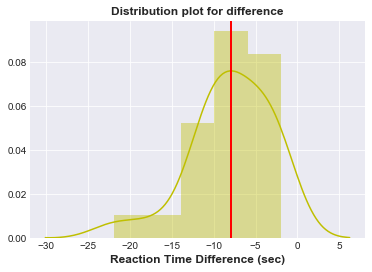

In [31]:
ax = sns.distplot(diff,color="y")
plt.axvline(diff.mean(),color='red', linewidth=2)

plt.title('Distribution plot for difference', fontsize=12, fontweight='bold')
plt.xlabel('Reaction Time Difference (sec)', fontweight='bold', fontsize=12)
plt.show()

In [30]:
# Calculate t_score and p_value by ttest_rel, whcih for paired samples from scipy.stats
from scipy.stats import ttest_rel
t_p_scipy = ttest_rel(df['Congruent'],df['Incongruent'])
t_p_scipy

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

测试总结  

* Alpha为0.05, P值为0.00000004103， Pvalue<Alpha 表示Congruent总体平均值大于或等于Incongruent总体平均值的可能性很小，小于alpha临界值。
* t-critical 值为正负1.714, t_score (-8.021) < t critical (-1.714), 
* 据此拒绝零假设$H_0$:   **$u_{congruent}$** >= **$u_{incongruent}$**
* 此结果符合预期，从常理和习惯推断，在文字和颜色一致条件下人的反应时间一般比文字和颜色不一致条件下的反应时间短